In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call. Their website + my API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mangan
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | cap malheureux
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | kragero
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | varhaug
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 20 of Set 1 | karasburg
Processing Record 21 of Set 1 |

Processing Record 35 of Set 4 | kutum
Processing Record 36 of Set 4 | humaita
Processing Record 37 of Set 4 | saint-francois
Processing Record 38 of Set 4 | moron
Processing Record 39 of Set 4 | jabiru
City not found. Skipping...
Processing Record 40 of Set 4 | bulgan
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | zhoucheng
Processing Record 43 of Set 4 | monrovia
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | mrirt
City not found. Skipping...
Processing Record 46 of Set 4 | haines junction
Processing Record 47 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 4 | viedma
Processing Record 49 of Set 4 | puerto leguizamo
Processing Record 50 of Set 4 | thinadhoo
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | sacramento
Processing Record 4 of Set 5 | yar-sale
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | aberdeen
Processing Recor

Processing Record 23 of Set 8 | sambava
Processing Record 24 of Set 8 | ziro
Processing Record 25 of Set 8 | srednekolymsk
Processing Record 26 of Set 8 | kyren
Processing Record 27 of Set 8 | egvekinot
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | aitape
Processing Record 30 of Set 8 | bombay
Processing Record 31 of Set 8 | kozhva
Processing Record 32 of Set 8 | provideniya
Processing Record 33 of Set 8 | nhulunbuy
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | north augusta
Processing Record 36 of Set 8 | launceston
Processing Record 37 of Set 8 | high level
Processing Record 38 of Set 8 | gaogou
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | durban
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | havoysund
Processing Record 43 of Set 8 | farap
Processing Record 44 of Set 8 | ustka
Processing Record 45 of Set 8 | kambove
Pro

Processing Record 11 of Set 12 | quelimane
Processing Record 12 of Set 12 | palmer
Processing Record 13 of Set 12 | banda aceh
Processing Record 14 of Set 12 | capaci
Processing Record 15 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 16 of Set 12 | lakes entrance
Processing Record 17 of Set 12 | naxos
Processing Record 18 of Set 12 | the valley
Processing Record 19 of Set 12 | nemuro
Processing Record 20 of Set 12 | laguna
Processing Record 21 of Set 12 | maniitsoq
Processing Record 22 of Set 12 | saurimo
Processing Record 23 of Set 12 | sao joao da barra
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | locri
Processing Record 26 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 12 | keetmanshoop
Processing Record 28 of Set 12 | half moon bay
Processing Record 29 of Set 12 | hue
Processing Record 30 of Set 12 | acari
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | motygino
Pr

In [12]:
len(city_data)

550

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mangan,27.5167,88.5333,80.67,79,74,4.81,IN,2022-06-01 02:55:01
1,Klaksvik,62.2266,-6.5890,40.12,81,21,4.34,FO,2022-06-01 02:55:01
2,Cayenne,4.9333,-52.3333,76.08,1,100,0.00,GF,2022-06-01 02:50:20
3,Cap Malheureux,-19.9842,57.6142,71.47,67,84,3.00,MU,2022-06-01 02:55:02
4,Rikitea,-23.1203,-134.9692,77.41,76,77,12.82,PF,2022-06-01 02:55:03
5,Longyearbyen,78.2186,15.6401,44.44,87,75,2.30,SJ,2022-06-01 02:55:03
6,Castro,-24.7911,-50.0119,53.94,99,100,7.07,BR,2022-06-01 02:55:04
7,Ribeira Grande,38.5167,-28.7000,61.23,81,49,13.69,PT,2022-06-01 02:55:04
8,Qaanaaq,77.4840,-69.3632,18.19,79,12,6.06,GL,2022-06-01 02:55:05
9,Kragero,58.8693,9.4149,48.58,83,100,3.98,NO,2022-06-01 02:55:05


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mangan,IN,2022-06-01 02:55:01,27.5167,88.5333,80.67,79,74,4.81
1,Klaksvik,FO,2022-06-01 02:55:01,62.2266,-6.5890,40.12,81,21,4.34
2,Cayenne,GF,2022-06-01 02:50:20,4.9333,-52.3333,76.08,1,100,0.00
3,Cap Malheureux,MU,2022-06-01 02:55:02,-19.9842,57.6142,71.47,67,84,3.00
4,Rikitea,PF,2022-06-01 02:55:03,-23.1203,-134.9692,77.41,76,77,12.82
5,Longyearbyen,SJ,2022-06-01 02:55:03,78.2186,15.6401,44.44,87,75,2.30
6,Castro,BR,2022-06-01 02:55:04,-24.7911,-50.0119,53.94,99,100,7.07
7,Ribeira Grande,PT,2022-06-01 02:55:04,38.5167,-28.7000,61.23,81,49,13.69
8,Qaanaaq,GL,2022-06-01 02:55:05,77.4840,-69.3632,18.19,79,12,6.06
9,Kragero,NO,2022-06-01 02:55:05,58.8693,9.4149,48.58,83,100,3.98


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

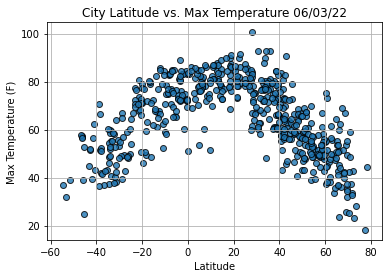

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

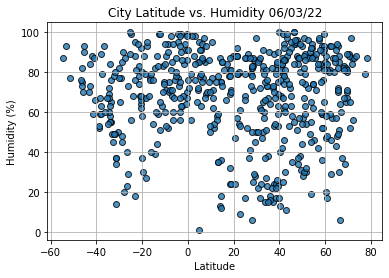

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

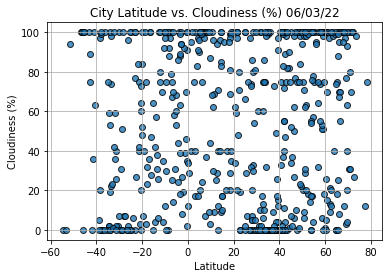

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

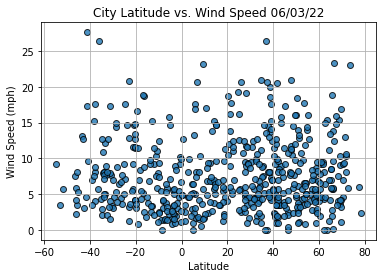

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()